# Problem set 2

António Rebelo _55761_ & Marco Mercier _55877_


## 2.1 SOM

In [55]:
import matplotlib.pylab as plt
%matplotlib inline
# import sompy as sompy
import pandas as pd
import numpy as np
from time import time
import sompy

Lets create the dataset of 30 random points centered on each face of a cube of side 2:

In [56]:
# number of points at each face
n = 30

# scale of the gaussian random generator
sc = 0.1

# creation of the 6 faces of the cube
np.random.seed(15)

face_1 = pd.DataFrame(data = np.random.normal(loc=1.0, scale=sc, size=(n,3)))
face_1[2]= 0
face_2 = pd.DataFrame(data = np.random.normal(loc=1.0, scale=sc, size=(n,3)))
face_2[2]= 2

face_3 = pd.DataFrame(data =np.random.normal(loc=1.0, scale=sc, size=(n,3)))
face_3[1]=0
face_4 = pd.DataFrame(data =np.random.normal(loc=1.0, scale=sc, size=(n,3)))
face_4[1]=2

face_5 = pd.DataFrame(data =np.random.normal(loc=1.0, scale=sc, size=(n,3)))
face_5[0]=0
face_6 = pd.DataFrame(data =np.random.normal(loc=1.0, scale=sc, size=(n,3)))
face_6[0]=2


cube = np.concatenate((face_1, face_2, face_3, face_4, face_5, face_6))

Lets plot the clusters in the faces of the cube

(0.0, 2.0)

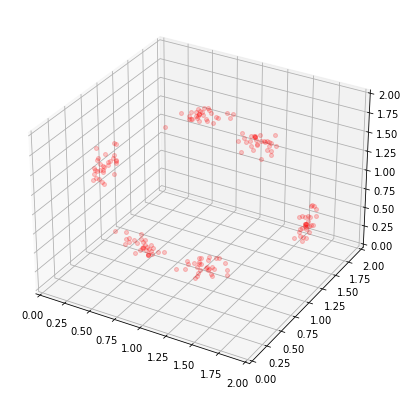

In [57]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(cube[:,0], cube[:,1], cube[:,2],'or',alpha=0.2, markersize=4)
ax.set_ylim(0,2)
ax.set_xlim(0,2)

In [58]:
# Lets train a SOM with 30x30 neurons
mapsize = [30,30]

som = sompy.SOMFactory.build(cube, mapsize, mask=None, mapshape='planar', lattice='rect', 
                             normalization='var', initialization='pca', neighborhood='gaussian', 
                             training='batch', name='sompy')


som.train(n_job=-1, verbose='info')

056000, quantization error: 0.071484

 epoch: 74 ---> elapsed time:  0.054000, quantization error: 0.070391

 epoch: 75 ---> elapsed time:  0.103000, quantization error: 0.068627

 epoch: 76 ---> elapsed time:  0.049000, quantization error: 0.067875

 epoch: 77 ---> elapsed time:  0.034000, quantization error: 0.067091

 epoch: 78 ---> elapsed time:  0.058000, quantization error: 0.066385

 epoch: 79 ---> elapsed time:  0.055000, quantization error: 0.065796

 epoch: 80 ---> elapsed time:  0.048000, quantization error: 0.065199

 epoch: 81 ---> elapsed time:  0.053000, quantization error: 0.064091

 epoch: 82 ---> elapsed time:  0.067000, quantization error: 0.063526

 epoch: 83 ---> elapsed time:  0.073000, quantization error: 0.062708

 epoch: 84 ---> elapsed time:  0.069000, quantization error: 0.061937

 epoch: 85 ---> elapsed time:  0.045000, quantization error: 0.061203

 epoch: 86 ---> elapsed time:  0.064000, quantization error: 0.060444

 epoch: 87 ---> elapsed time:  0.082000

* **Final quantization error**: 0.014045

### Visualization

Lets first explore the mapview with _codebook_ and _cluster_ views:

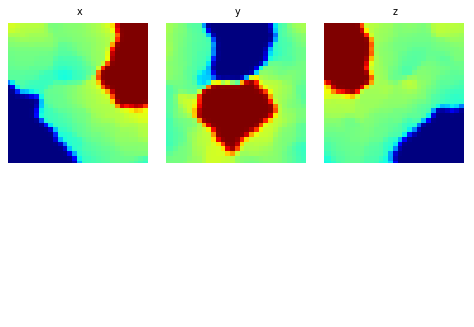

In [59]:
# naming the components
som.component_names = ['x','y', 'z']

# create the mapview
v = sompy.mapview.View2DPacked(50, 50, '',text_size=8)  

# show the codebook
v.show(som, what='codebook', which_dim='all', cmap='jet', col_sz=3)

The _codebook_ is able to represent 2 cluster in each plane, as can be seen in blue and red.

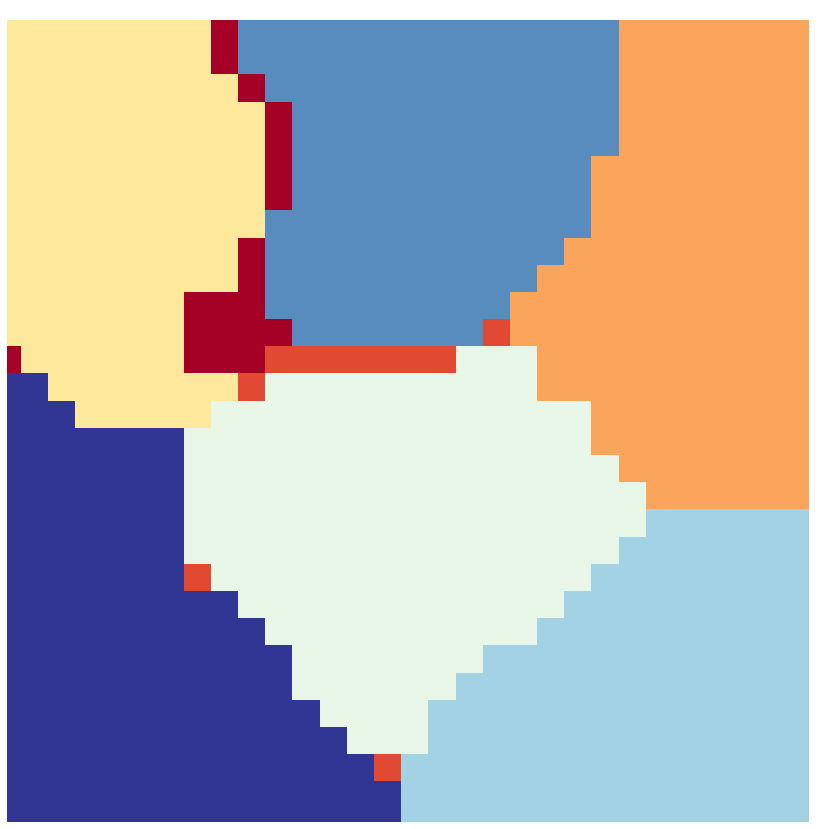

In [60]:
# show the clusters
v.show(som, what='cluster')

Mapview of the clusters shows that SOM was able to find the 6 clusters but also considers two extra groups in _red_ and _orange_ because by default if looks for 8 clusters.

Lets confirm now with the **hitmap**:

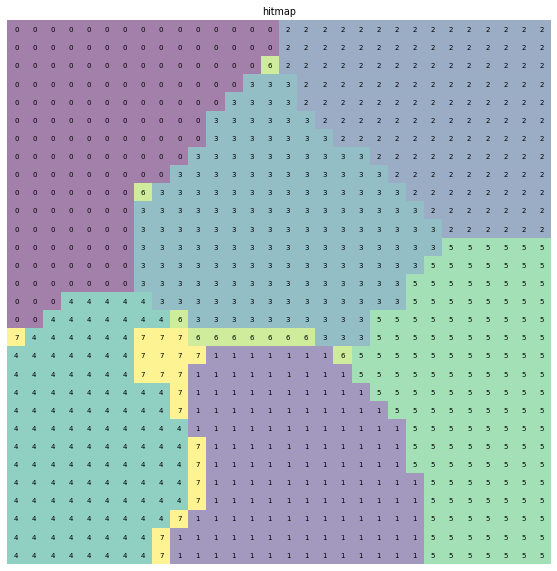

In [61]:
h = sompy.hitmap.HitMapView(10, 10, 'hitmap', text_size=8, show_text=True)
h.show(som)

The clusters are present but in the **hitmap** it's possible to see that it considers 8 clusters again since both hitmap and mapview considers 8 clusters by default.

Lets see what happens if the number of clusters is defined to be 6:

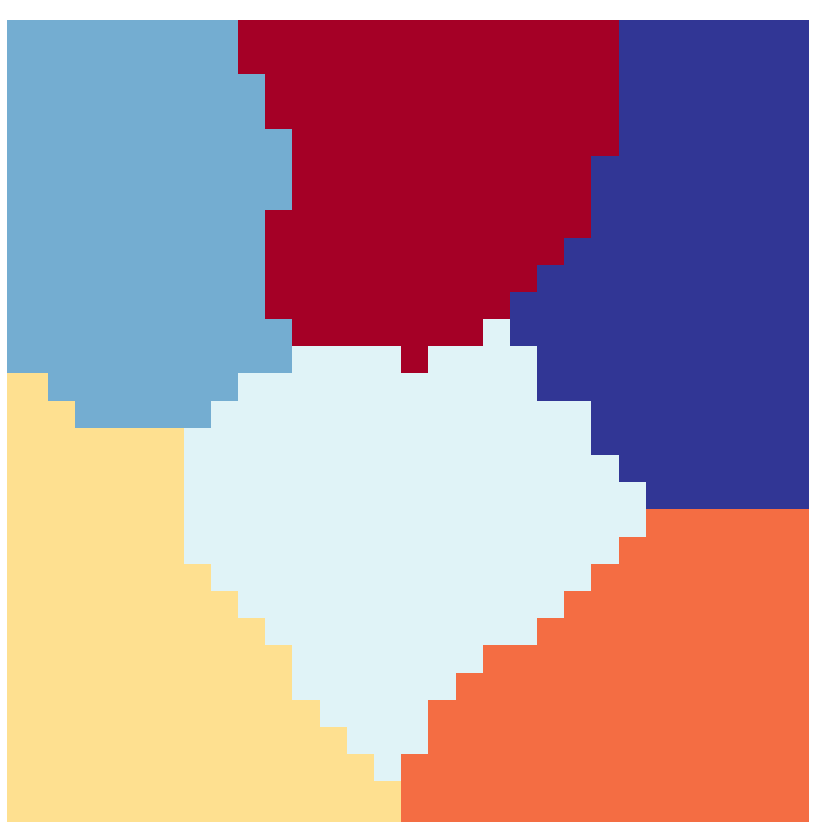

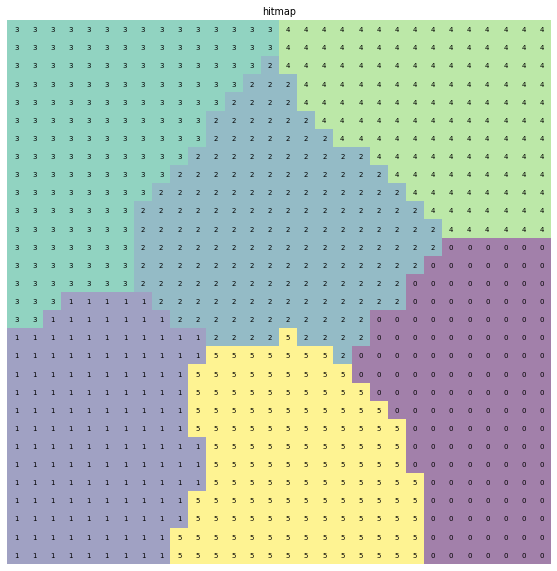

In [62]:
cl = som.cluster(n_clusters=6) # definition of the number of clusters

h = sompy.hitmap.HitMapView(10, 10, 'hitmap', text_size=8, show_text=True)
v = sompy.mapview.View2DPacked(50, 50, '',text_size=8)
v.show(som, what='cluster')
h.show(som)


When ```k``` is defined, the number of clusters is defined to be and the other two are not present anymore.

The visualization using UMatrix is better for SOM since it depicts the distance between neurons, providing a better tool for cluster definition without predefining how many clusters one wants to achieve, providing a better tool than k-means in this sense.

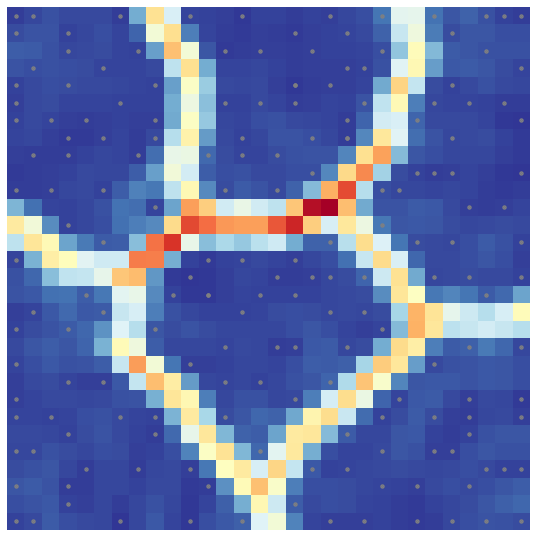

In [63]:
# definition of the umatrix
u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=False, blob=False)

**Take Aways:**

* UMatrix is better at visualizing the clusters found by SOM in a completely unsupervised way
* Hitmap only provided an accurate visualization when the number of clusters is defined.
 
* SOM was able to find the 6 clusters and perform projection of 3-dimensional data into a 2D space, as can be seen in the UMatrix above.

## Part 2

Lets verify now with a similar dataset with 30 points around each face center in 3D, i.e. in a small volume around the center of each face (instead of lying on the face):

In [64]:
n = 30
sc = 0.1

# the scale of the 3D part of the distribution
sc_face = 0.1


np.random.seed(15)
face_1 = pd.DataFrame(data = np.random.normal(loc=1.0, scale=sc, size=(n,3)))
face_1[2]= np.random.normal(loc=0.0, scale=sc_face, size=(n,1))
face_2 = pd.DataFrame(data = np.random.normal(loc=1.0, scale=sc, size=(n,3)))
face_2[2]= np.random.normal(loc=2.0, scale=sc_face, size=(n,1))

face_3 = pd.DataFrame(data =np.random.normal(loc=1.0, scale=sc, size=(n,3)))
face_3[1]= np.random.normal(loc=0.0, scale=sc_face, size=(n,1))
face_4 = pd.DataFrame(data =np.random.normal(loc=1.0, scale=sc, size=(n,3)))
face_4[1]= np.random.normal(loc=2.0, scale=sc_face, size=(n,1))

face_5 = pd.DataFrame(data =np.random.normal(loc=1.0, scale=sc, size=(n,3)))
face_5[0]= np.random.normal(loc=0.0, scale=sc_face, size=(n,1))
face_6 = pd.DataFrame(data =np.random.normal(loc=1.0, scale=sc, size=(n,3)))
face_6[0]= np.random.normal(loc=2.0, scale=sc_face, size=(n,1))

cube = np.concatenate((face_1, face_2, face_3, face_4, face_5, face_6))

<Figure size 432x288 with 0 Axes>

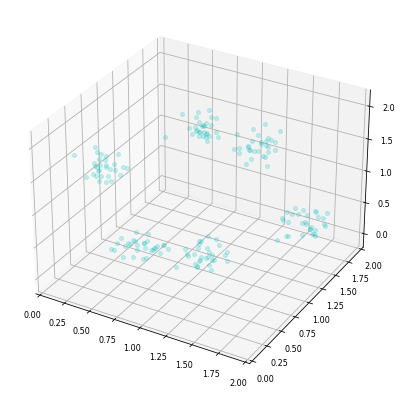

In [65]:
# plotting the cube

fig = plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(cube[:,0], cube[:,1], cube[:,2],'oc',alpha=0.2, markersize=4)
ax.set_ylim(0,2)
ax.set_xlim(0,2)
fig.set_size_inches(7,7)

In [66]:
# definition of the NN map size
mapsize = [30,30]

# initialization of SOM
som = sompy.SOMFactory.build(cube, mapsize, mask=None, mapshape='planar', lattice='rect', 
                             normalization='var', initialization='pca', neighborhood='gaussian', 
                             training='batch', name='sompy')

# training
som.train(n_job=-1, verbose='info')

057000, quantization error: 0.119376

 epoch: 74 ---> elapsed time:  0.023000, quantization error: 0.118654

 epoch: 75 ---> elapsed time:  0.064000, quantization error: 0.117738

 epoch: 76 ---> elapsed time:  0.072000, quantization error: 0.117016

 epoch: 77 ---> elapsed time:  0.061000, quantization error: 0.116318

 epoch: 78 ---> elapsed time:  0.107000, quantization error: 0.115644

 epoch: 79 ---> elapsed time:  0.063000, quantization error: 0.115540

 epoch: 80 ---> elapsed time:  0.086000, quantization error: 0.114860

 epoch: 81 ---> elapsed time:  0.051000, quantization error: 0.114022

 epoch: 82 ---> elapsed time:  0.067000, quantization error: 0.113252

 epoch: 83 ---> elapsed time:  0.061000, quantization error: 0.112000

 epoch: 84 ---> elapsed time:  0.062000, quantization error: 0.110554

 epoch: 85 ---> elapsed time:  0.051000, quantization error: 0.109443

 epoch: 86 ---> elapsed time:  0.063000, quantization error: 0.108440

 epoch: 87 ---> elapsed time:  0.038000

With the previous data set we had:

* **Final quantization error**: 0.014045
 
Now it is:
 
* **Final quantization error**: 0.035219

So the final quantization of error was higher.

### Visualization

Lets use again mapview, hitmap with k=6 clusters and umatrix to compare:

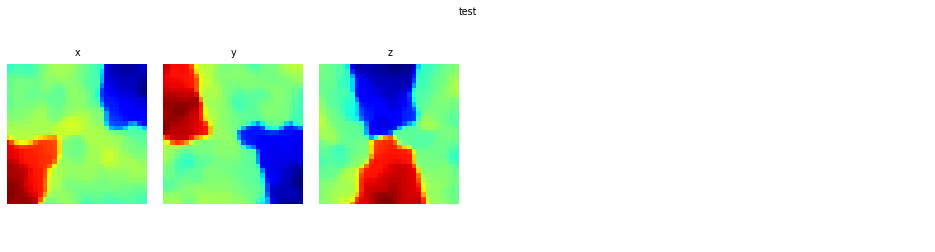

In [67]:
som.component_names = ['x','y', 'z']
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  

cl = som.cluster(n_clusters=6) # definition of the number of clusters

v.show(som, what='codebook', which_dim='all', cmap='jet', col_sz=6)

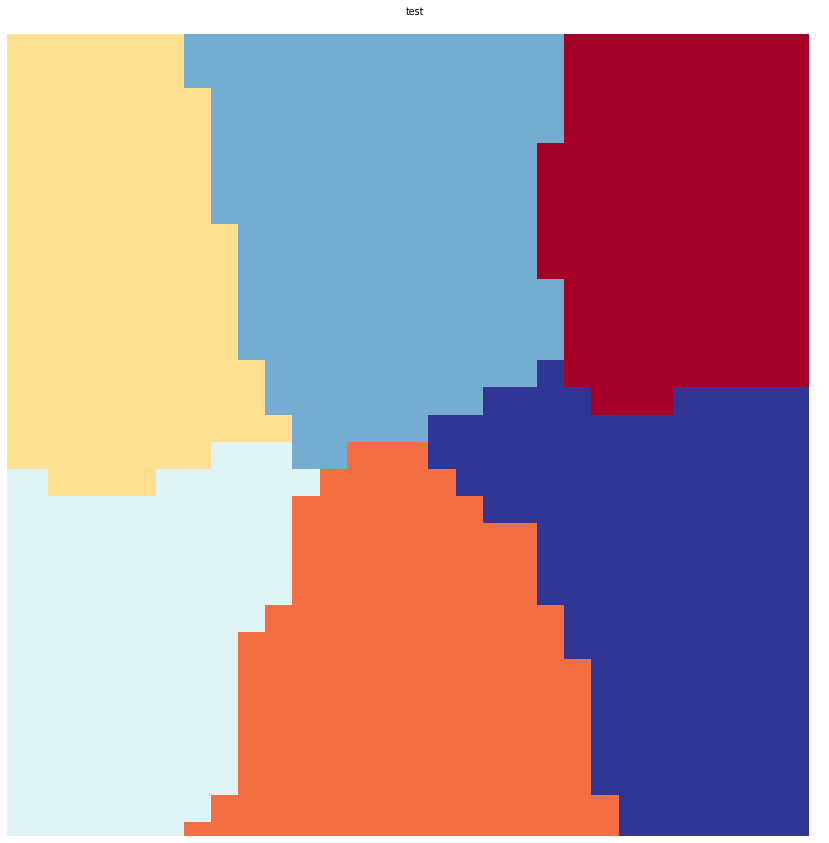

In [68]:
v.show(som, what='cluster')

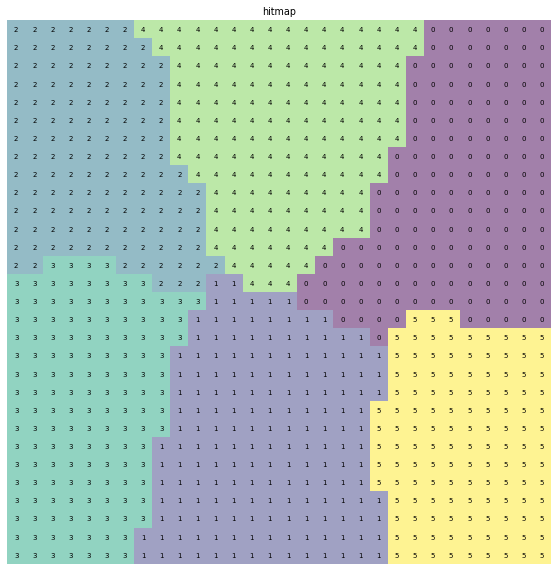

In [69]:
h = sompy.hitmap.HitMapView(10, 10, 'hitmap', text_size=8, show_text=True)
h.show(som)

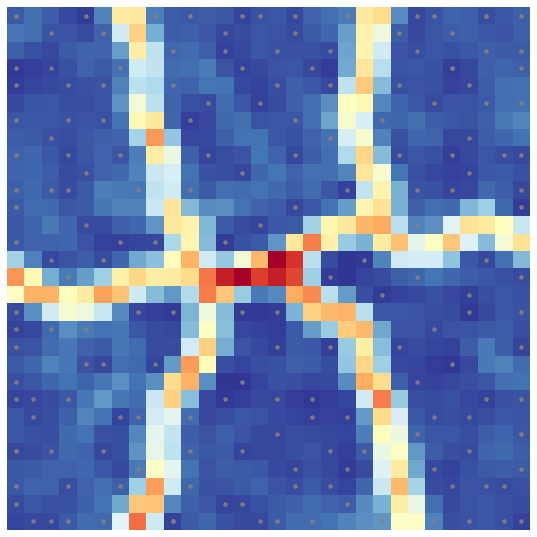

In [70]:
#But Umatrix finds the clusters easily without any predefinition of the number of clusters

u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=False, blob=False)


**Take-aways:**

* Hitmap and mapview were able to show the clusters defined by the user while UMatrix makes it easy to interpret the 6 real clusters in an unsupervised way

* Despite a higher quantization error, the algorithm was still able to get the 6 clusters and performa de projection of 3D data in 2D plane.

# Exercise two

First we define the training data. We'll use the numbers 4,5,6.

In [71]:
import numpy as np
from neupy import algorithms



def draw_bin_image(image_matrix):
    for row in image_matrix.tolist():
        print('| ' + ' '.join(' *'[val] for val in row))

        
#        
four = np.matrix([
    0, 1, 0, 1, 0,
    0, 1, 0, 1, 0,
    0, 1, 1, 1, 0,
    0, 0, 0, 1, 0,
    0, 0, 0, 1, 0,
    0, 0, 0, 1, 0
])

five = np.matrix([
    0, 1, 1, 1, 0,
    0, 1, 0, 0, 0,
    0, 1, 1, 0, 0,
    0, 0, 0, 1, 0,
    0, 0, 0, 1, 0,
    0, 1, 1, 0, 0
])

six = np.matrix([
    0, 1, 1, 1, 0,
    0, 1, 0, 0, 0,
    0, 1, 0, 0, 0,
    0, 1, 1, 1, 0,
    0, 1, 0, 1, 0,
    0, 1, 1, 1, 0
])

original_numbers = [four,five,six]

print('Training data:\n')
for number in original_numbers:
    draw_bin_image(number.reshape((6, 5)))
    print('\n')

Training data:

|   *   *  
|   *   *  
|   * * *  
|       *  
|       *  
|       *  


|   * * *  
|   *      
|   * *    
|       *  
|       *  
|   * *    


|   * * *  
|   *      
|   *      
|   * * *  
|   *   *  
|   * * *  




Now the hopfield network is trained with this data

In [72]:
data = np.concatenate([four, five, six], axis=0)

dhnet = algorithms.DiscreteHopfieldNetwork(mode='sync')
dhnet.train(data)

### Moving values in the input

Now the distorted data is built by moving around some "pixels"

In [73]:

moved_four = np.matrix([
    0, 1, 0, 1, 0,
    1, 0, 0, 1, 0,
    0, 1, 1, 0, 1,
    0, 0, 0, 1, 0,
    0, 0, 1, 0, 0,
    0, 0, 0, 1, 0
])

moved_five = np.matrix([
    0, 1, 1, 0, 1,
    0, 1, 0, 0, 0,
    1, 0, 1, 0, 0,
    0, 0, 0, 1, 0,
    0, 0, 1, 0, 0,
    0, 1, 1, 0, 0
])

moved_six = np.matrix([
    0, 1, 1, 1, 0,
    1, 0, 0, 0, 0,
    0, 1, 0, 0, 1,
    0, 1, 1, 0, 0,
    1, 0, 0, 1, 0,
    0, 1, 1, 1, 0
])

moved_numbers = [moved_four,moved_five,moved_six]

print('Distored data:\n')
for number in moved_numbers:
    draw_bin_image(number.reshape((6, 5)))
    print('\n')


Distored data:

|   *   *  
| *     *  
|   * *   *
|       *  
|     *    
|       *  


|   * *   *
|   *      
| *   *    
|       *  
|     *    
|   * *    


|   * * *  
| *        
|   *     *
|   * *    
| *     *  
|   * * *  




Now the results of the predictions

In [74]:
print('Results:\n')
for number in moved_numbers:
    result = dhnet.predict(number)
    draw_bin_image(result.reshape((6, 5)))
    print('\n')
    


Results:

|   *   *  
|   *   *  
|   * * *  
|       *  
|       *  
|       *  


|   * * *  
|   *      
|   * *    
|       *  
|       *  
|   * *    


|   * * *  
|   *      
|   * *    
|       *  
|   *   *  
|   * * *  




The first two predictions were perfect. In the last case there was one pixel that was rendered incorrectly and one that was not rendered at all. The final result looks more like a 5 than a 6. Since they are somewhat similar, it's understandable that the network confused the two.

### Deleting values in the input

For comparison purposes, we delete exactly the same pixels that we moved before. 

In [75]:

del_four = np.matrix([
    0, 1, 0, 1, 0,
    0, 0, 0, 1, 0,
    0, 1, 1, 0, 0,
    0, 0, 0, 1, 0,
    0, 0, 0, 0, 0,
    0, 0, 0, 1, 0
])

del_five = np.matrix([
    0, 1, 1, 0, 0,
    0, 1, 0, 0, 0,
    0, 0, 1, 0, 0,
    0, 0, 0, 1, 0,
    0, 0, 0, 0, 0,
    0, 1, 1, 0, 0
])

del_six = np.matrix([
    0, 1, 1, 1, 0,
    0, 0, 0, 0, 0,
    0, 1, 0, 0, 0,
    0, 1, 1, 0, 0,
    0, 0, 0, 1, 0,
    0, 1, 1, 1, 0
])

print('Distorted data with missing inputs:\n')
del_numbers = [del_four,del_five,del_six]

for number in del_numbers:
    draw_bin_image(number.reshape((6, 5)))
    print('\n')

Distorted data with missing inputs:

|   *   *  
|       *  
|   * *    
|       *  
|          
|       *  


|   * *    
|   *      
|     *    
|       *  
|          
|   * *    


|   * * *  
|          
|   *      
|   * *    
|       *  
|   * * *  




The 6 now looks very similar to a 5, so let's see what the network will see.

In [76]:
print('Results:\n')
for number in moved_numbers:
    result = dhnet.predict(number)
    draw_bin_image(result.reshape((6, 5)))
    print('\n')

Results:

|   *   *  
|   *   *  
|   * * *  
|       *  
|       *  
|       *  


|   * * *  
|   *      
|   * *    
|       *  
|       *  
|   * *    


|   * * *  
|   *      
|   * *    
|       *  
|   *   *  
|   * * *  




Interestingly, the results are exactly the same, let's see with a different distortion.

In [77]:

del_four = np.matrix([
    0, 0, 0, 1, 0,
    0, 1, 0, 1, 0,
    0, 1, 1, 0, 0,
    0, 0, 0, 1, 0,
    0, 0, 0, 1, 0,
    0, 0, 0, 0, 0
])

del_five = np.matrix([
    0, 0, 1, 1, 0,
    0, 1, 0, 0, 0,
    0, 1, 0, 0, 0,
    0, 0, 0, 1, 0,
    0, 0, 0, 1, 0,
    0, 1, 1, 0, 0
])

del_six = np.matrix([
    0, 1, 0, 1, 0,
    0, 1, 0, 0, 0,
    0, 1, 0, 0, 0,
    0, 1, 0, 1, 0,
    0, 1, 0, 1, 0,
    0, 1, 0, 1, 0
])

print('Distorted data with missing inputs:\n')
del_numbers = [del_four,del_five,del_six]

for number in del_numbers:
    draw_bin_image(number.reshape((6, 5)))
    print('\n')

Distorted data with missing inputs:

|       *  
|   *   *  
|   * *    
|       *  
|       *  
|          


|     * *  
|   *      
|   *      
|       *  
|       *  
|   * *    


|   *   *  
|   *      
|   *      
|   *   *  
|   *   *  
|   *   *  




In [78]:
print('Results:\n')
for number in moved_numbers:
    result = dhnet.predict(number)
    draw_bin_image(result.reshape((6, 5)))
    print('\n')

Results:

|   *   *  
|   *   *  
|   * * *  
|       *  
|       *  
|       *  


|   * * *  
|   *      
|   * *    
|       *  
|       *  
|   * *    


|   * * *  
|   *      
|   * *    
|       *  
|   *   *  
|   * * *  




The results are the same once again. We conclude, that the results are not so different and except for the case of the 6, the network has no trouble in identifying the correct number.

## Training with additional data

Now let's test the effects of trainning with addtional data. First the numbers are "drawn"

In [79]:
four = np.matrix([
    0, 1, 0, 1, 0,
    0, 1, 0, 1, 0,
    0, 1, 1, 1, 0,
    0, 0, 0, 1, 0,
    0, 0, 0, 1, 0,
    0, 0, 0, 1, 0
])

five = np.matrix([
    0, 1, 1, 1, 0,
    0, 1, 0, 0, 0,
    0, 1, 1, 0, 0,
    0, 0, 0, 1, 0,
    0, 0, 0, 1, 0,
    0, 1, 1, 0, 0
])

six = np.matrix([
    0, 1, 1, 1, 0,
    0, 1, 0, 0, 0,
    0, 1, 0, 0, 0,
    0, 1, 1, 1, 0,
    0, 1, 0, 1, 0,
    0, 1, 1, 1, 0
])


seven = np.matrix([
    0, 1, 1, 1, 0,
    0, 0, 0, 1, 0,
    0, 0, 1, 1, 1,
    0, 0, 0, 1, 0,
    0, 0, 0, 1, 0,
    0, 0, 0, 1, 0
])

eight = np.matrix([
    0, 1, 1, 1, 0,
    0, 1, 0, 1, 0,
    0, 1, 1, 1, 0,
    0, 1, 0, 1, 0,
    0, 1, 0, 1, 0,
    0, 1, 1, 1, 0
])


nine = np.matrix([
    0, 1, 1, 1, 0,
    0, 1, 0, 1, 0,
    0, 1, 1, 1, 0,
    0, 0, 0, 1, 0,
    0, 0, 1, 0, 0,
    0, 1, 0, 0, 0
])

ten = np.matrix([
    1, 1, 1, 1, 1,
    0, 1, 1, 0, 1,
    0, 1, 1, 0, 1,
    0, 1, 1, 0, 1,
    0, 1, 1, 0, 1,
    0, 1, 1, 1, 1
])




all_numbers = [four,five,six,seven,eight,nine,ten]

for number in all_numbers:
    draw_bin_image(number.reshape((6, 5)))
    print('\n')

|   *   *  
|   *   *  
|   * * *  
|       *  
|       *  
|       *  


|   * * *  
|   *      
|   * *    
|       *  
|       *  
|   * *    


|   * * *  
|   *      
|   *      
|   * * *  
|   *   *  
|   * * *  


|   * * *  
|       *  
|     * * *
|       *  
|       *  
|       *  


|   * * *  
|   *   *  
|   * * *  
|   *   *  
|   *   *  
|   * * *  


|   * * *  
|   *   *  
|   * * *  
|       *  
|     *    
|   *      


| * * * * *
|   * *   *
|   * *   *
|   * *   *
|   * *   *
|   * * * *




In [80]:
all_numbers = [four,five,six,seven,eight,nine,ten]

for i in range(3,len(all_numbers)+1):
    data = np.concatenate(all_numbers[:i], axis=0)

    dhnet = algorithms.DiscreteHopfieldNetwork(mode='sync',)
    dhnet.train(data)
    
    
    print(f'RESULTS TRAINING WITH {i} NUMBERS:\n')
    for number in moved_numbers:
        result = dhnet.predict(number)
        draw_bin_image(result.reshape((6, 5)))
        print('\n')


RESULTS TRAINING WITH 3 NUMBERS:

|   *   *  
|   *   *  
|   * * *  
|       *  
|       *  
|       *  


|   * * *  
|   *      
|   * *    
|       *  
|       *  
|   * *    


|   * * *  
|   *      
|   * *    
|       *  
|   *   *  
|   * * *  


RESULTS TRAINING WITH 4 NUMBERS:

|   * * *  
|   *   *  
|   * * *  
|       *  
|       *  
|       *  


|   * * *  
|   *      
|   * *    
|       *  
|       *  
|   * * *  


|   * * *  
|   *      
|   * *    
|       *  
|       *  
|   * * *  


RESULTS TRAINING WITH 5 NUMBERS:

|   * * *  
|   *   *  
|   * * *  
|       *  
|       *  
|       *  


|   * * *  
|   *      
|   * *    
|       *  
|       *  
|   * * *  


|   * * *  
|   *      
|   * *    
|       *  
|   *   *  
|   * * *  




ValueError: You can't memorize more than 5 samples

With 4 training samples, the results get worse. The 4 gets mistaken with a 9 and the the 6 is now clearly mistaken as a 5. Besides that, the 5 also has pixel that was not supposed to be there.

With 5 training samples, the results are very similar comparative to 4 and the model won't even allow trainning with 6, since it's a larger number than the dimension of the input matrix.

### Take-aways:

The network has a limit in the information it can store, specially if there is significant overlap among the patterns as is the case. This is manifest in its ability to complete  distorted patterns, that gets worse as the number of training samples increases.